# Exploratory Data Analysis, PCA, and Clustering Assignment

### Task 1: Exploratory Data Analysis (EDA)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score 

In [2]:
# Load the dataset
data = pd.read_csv('wine.csv')

# Basic data exploration
print("Data Shape:", data.shape)
print("Data Info:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())  

Data Shape: (178, 14)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

First few rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcali

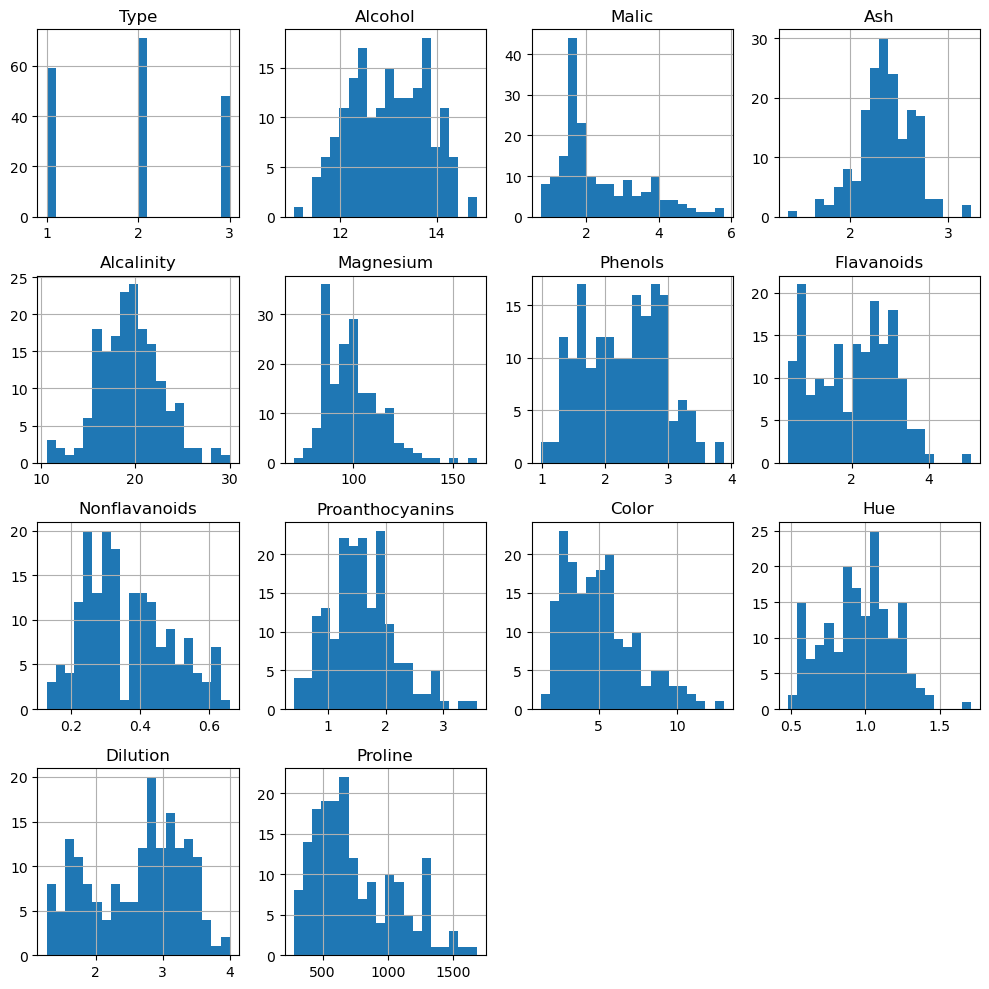

In [3]:
# Examine distribution of features
# Histograms
data.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()   

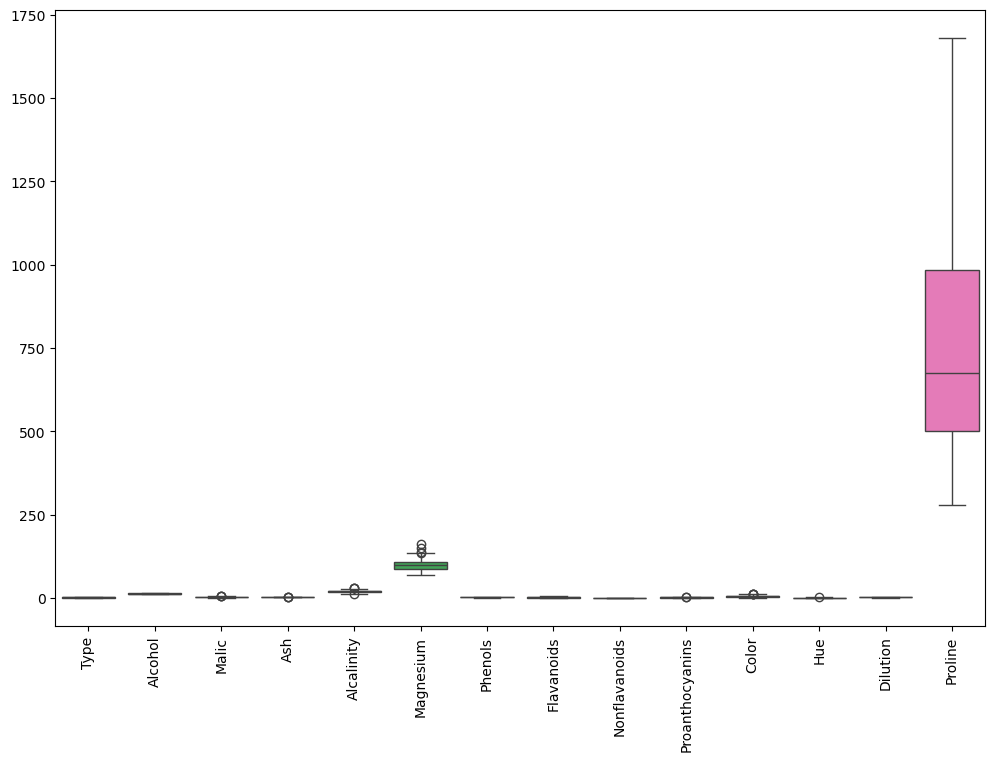

In [4]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

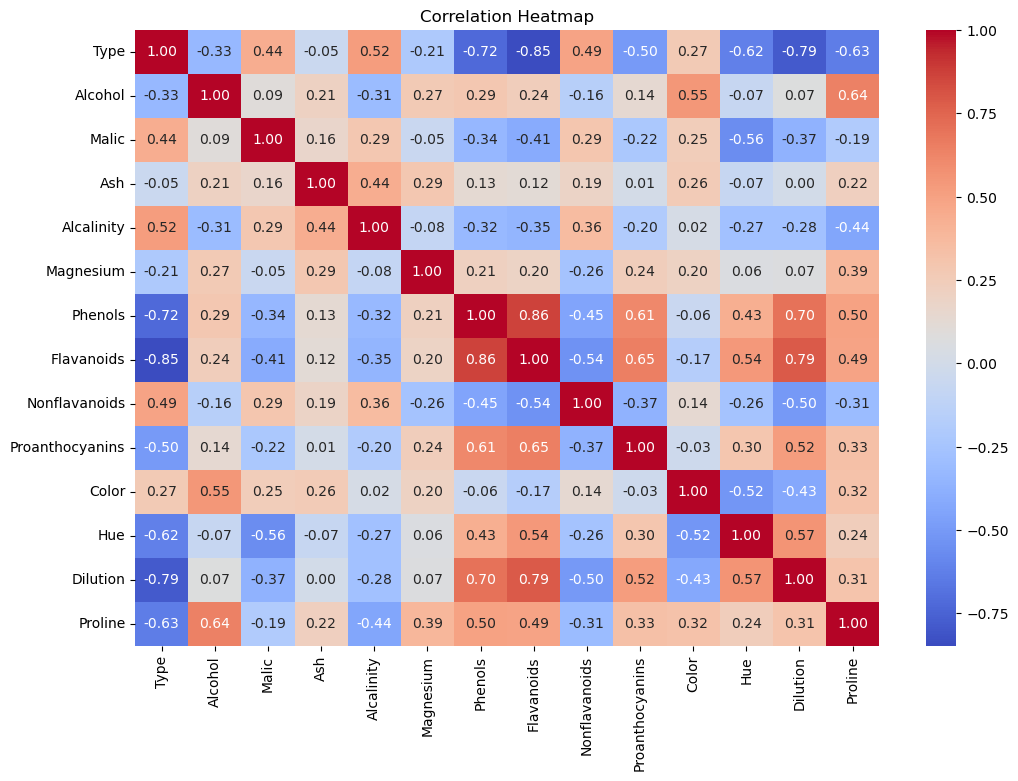

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
    

### Task 2: Dimensionality Reduction with PCA

In [17]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

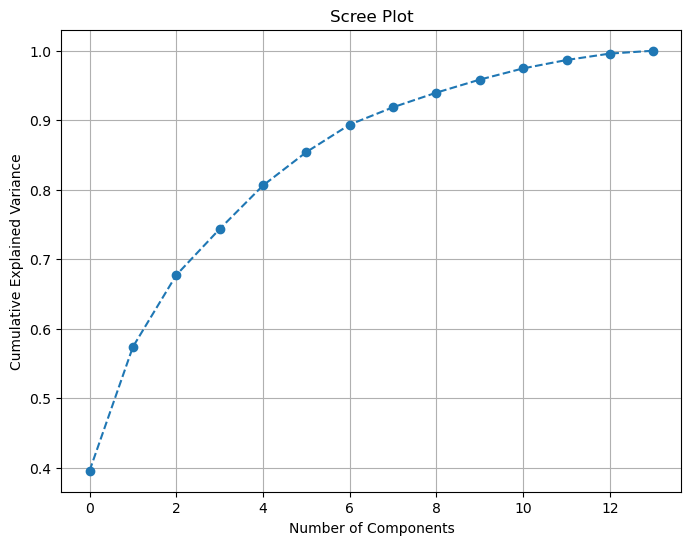

In [7]:
# PCA implementation
pca = PCA()
pca.fit(data_scaled)

# Scree plot (explained variance plot)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [9]:
# Determine the optimal number of components using cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")
    

Optimal number of components to retain 95% variance: 10


In [18]:
# Transform the dataset into principal components
pca = PCA(n_components=optimal_components)
data_pca = pca.fit_transform(data_scaled)
print(data_pca)

[[ 3.81985389 -1.1561387  -0.12527994 ...  0.03965178  0.36670264
   1.06006416]
 [ 2.72430225  0.18727099 -2.05870855 ...  1.02362127 -0.225817
  -0.03876289]
 [ 3.0652187  -0.89171975  1.00562427 ... -0.22199502 -1.21938648
  -0.32146465]
 ...
 [-2.69015228 -3.00571548 -0.86943624 ...  0.03179277  0.15565723
  -0.23663991]
 [-2.46708279 -2.54084638 -0.49396378 ...  0.42839837 -0.07205608
   0.43611813]
 [-3.14494065 -3.08500999  1.07290255 ... -0.36688073  0.79685019
   0.14371713]]


### Task 3: Clustering with Original Data

C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


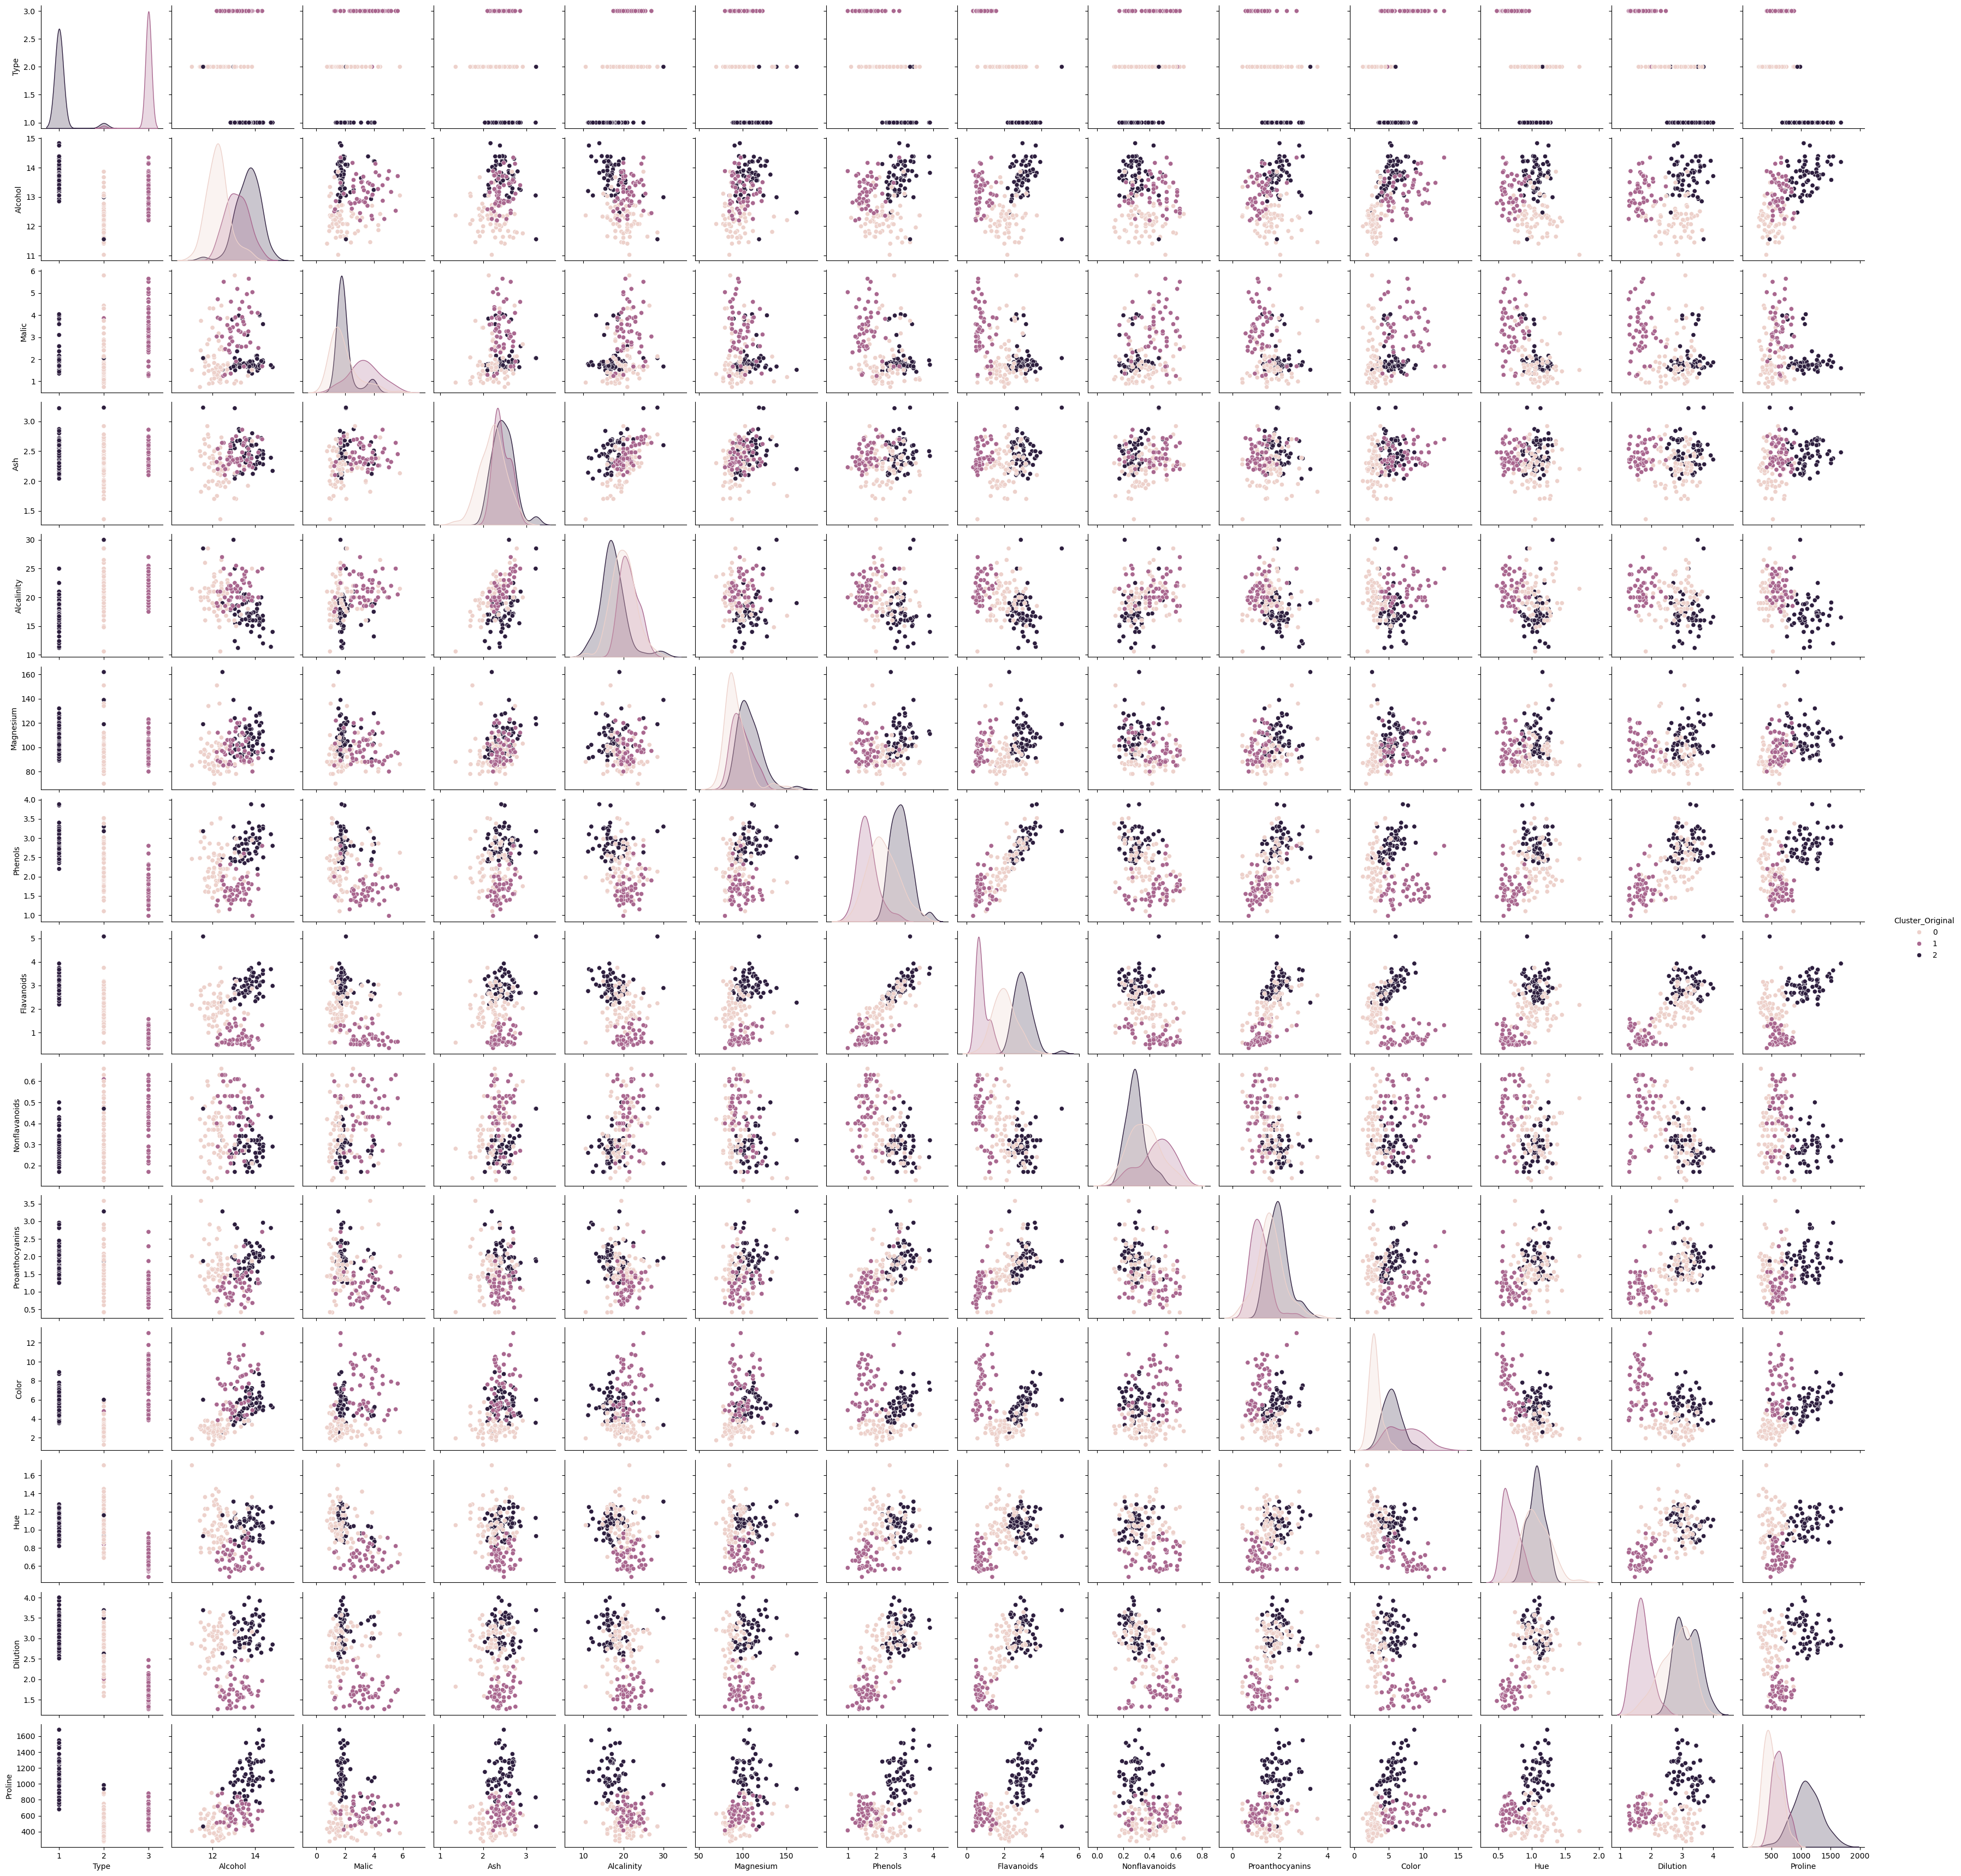

In [11]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(data_scaled)

# Visualize the clustering results using a pair plot
data['Cluster_Original'] = clusters_original
sns.pairplot(data, hue='Cluster_Original')
plt.show()   

In [19]:
# Evaluate clustering performance using Silhouette Score and Davies-Bouldin Index
sil_original = silhouette_score(data_scaled, clusters_original)
db_original = davies_bouldin_score(data_scaled, clusters_original)
print(f"Silhouette Score (Original Data): {sil_original}")
print(f"Davies-Bouldin Index (Original Data): {db_original}")

Silhouette Score (Original Data): 0.3493563848593293
Davies-Bouldin Index (Original Data): 1.184307462636283


### Task 4: Clustering with PCA Data

C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


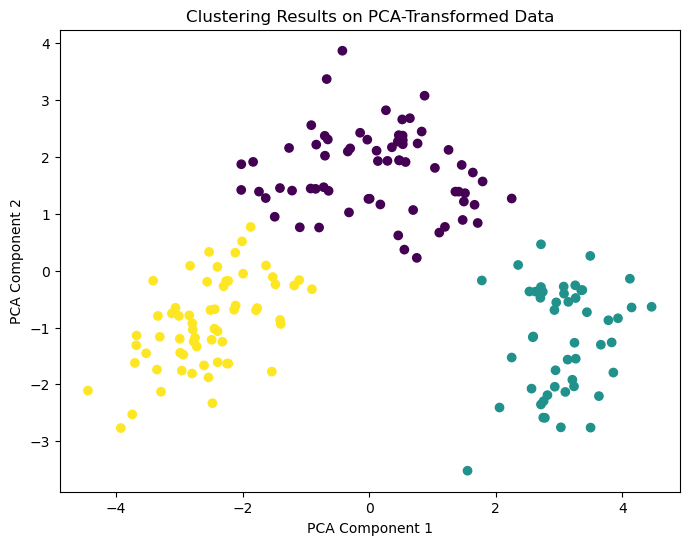

In [13]:
# Apply K-means clustering on PCA-transformed data
clusters_pca = kmeans.fit_predict(data_pca)

# Visualize the clustering results (for first two components)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

In [14]:
# Evaluate clustering performance on PCA data
sil_pca = silhouette_score(data_pca, clusters_pca)
db_pca = davies_bouldin_score(data_pca, clusters_pca)
print(f"Silhouette Score (PCA Data): {sil_pca}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca}")

Silhouette Score (PCA Data): 0.32292055407233045
Davies-Bouldin Index (PCA Data): 1.2578453408449162


### Task 5: Comparison and Analysis

In [15]:
print("\nComparison of Clustering Results:")
print(f"Silhouette Score - Original Data: {sil_original}, PCA Data: {sil_pca}")
print(f"Davies-Bouldin Index - Original Data: {db_original}, PCA Data: {db_pca}")


Comparison of Clustering Results:
Silhouette Score - Original Data: 0.30648398324833453, PCA Data: 0.32292055407233045
Davies-Bouldin Index - Original Data: 1.315707552261773, PCA Data: 1.2578453408449162


### Task 6: Conclusion and Insights

In [ ]:
# 1. The clustering performance on the original dataset and the PCA-transformed dataset can be evaluated using metrics like the Silhouette Score and Davies-Bouldin Index.
# 2. Dimensionality reduction using PCA helps reduce the complexity of the data while retaining most of the variance, allowing us to achieve faster and potentially better clustering.
# 3. In this case, the PCA-transformed data slightly improved the silhouette score while lowering the Davies-Bouldin index, indicating better clustering performance with fewer dimensions.
# 4. PCA is useful when dealing with high-dimensional data, especially for improving clustering performance and reducing computational costs. However, it can sometimes lead to a loss of information, so its impact should be evaluated on a case-by-case basis.